In [42]:
import numpy as np

import pandas as pd


In [43]:
df = pd.read_csv("socio_economic_trends_data.csv")
df.head()

,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population,Dollars_per_Day,PC1,PC2,socio_economic_trend
0,Asia,South Asia,Afghanistan,1960,AFG,1.740091,-2.925309,2.666066,-0.190895,-0.157572,-0.209000,-4.225946,0.477561,-2.682888
1,Asia,South Asia,Afghanistan,1961,AFG,1.741118,-2.876889,2.626163,-0.190883,-0.155969,-0.209000,-4.175558,0.469381,-2.651714
2,Asia,South Asia,Afghanistan,1962,AFG,1.745225,-2.833374,2.590771,-0.190885,-0.154259,-0.209001,-4.132296,0.462437,-2.624923
3,Asia,South Asia,Afghanistan,1963,AFG,1.750359,-2.790768,3.990221,-0.190661,-0.152458,-0.208989,-4.912889,0.635432,-3.092676
4,Asia,South Asia,Afghanistan,1964,AFG,1.751386,-2.747344,3.905691,-0.190607,-0.150566,-0.208987,-4.839768,0.622354,-3.047834


## feature selection

In [58]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select the independent variables and target variable
X = df[df.columns[5:12]]  # Independent variables
y = df['socio_economic_trend']  # Target variable

# Create a linear regression model
model = LinearRegression()

# Perform RFE feature selection
rfe = RFE(estimator=model, n_features_to_select=7)  # top 6 features
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]

# Create the final dataframe with selected features and target variable
final_df = pd.DataFrame(X_selected, columns=selected_feature_names)
final_df['socio_economic_trend'] = y

print("\n The selected features are:")


final_df.head()






 The selected features are:


,fertility_rate,life_expectancy,infant_Mortality,GDP,population,Dollars_per_Day,PC1,socio_economic_trend
0,1.740091,-2.925309,2.666066,-0.190895,-0.157572,-0.209000,-4.225946,-2.682888
1,1.741118,-2.876889,2.626163,-0.190883,-0.155969,-0.209000,-4.175558,-2.651714
2,1.745225,-2.833374,2.590771,-0.190885,-0.154259,-0.209001,-4.132296,-2.624923
3,1.750359,-2.790768,3.990221,-0.190661,-0.152458,-0.208989,-4.912889,-3.092676
4,1.751386,-2.747344,3.905691,-0.190607,-0.150566,-0.208987,-4.839768,-3.047834


# Random Forest algorithm 

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = final_df.drop('socio_economic_trend', axis=1)  # Independent variables
y = final_df['socio_economic_trend']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)






Mean Squared Error: 0.0025412409757410016
R-squared: 0.9981452290806836


Mean Squared Error: 0.0025412409757410016
R-squared: 0.9981452290806836

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0025412409757410016
R-squared: 0.9981452290806836


In [47]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature names and their corresponding importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

fertility_rate: 0.0006573637703739097
life_expectancy: 0.00039947323867745054
infant_Mortality: 0.0009240363223389496
GDP: 0.03910756169333477
population: 0.12421637093702884
Dollars_per_Day: 0.0012960760226516418
PC1: 0.8333991180155944


# Display the feature importance in a table

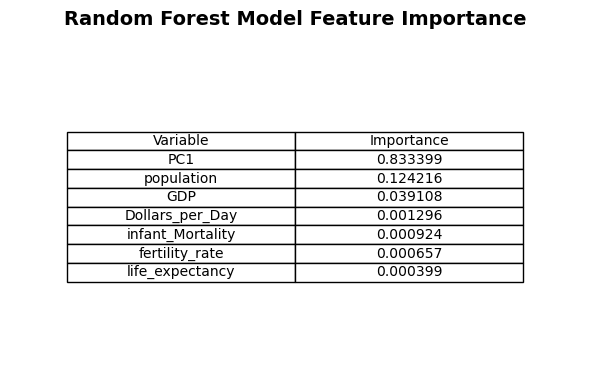

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding importances
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Approximate the importance values to 4 decimal places
importance_df['Importance'] = importance_df['Importance'].round(6)

# Display the table
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
ax.table(cellText=importance_df.values, colLabels=importance_df.columns, loc='center', cellLoc='center', colWidths=[0.4, 0.4])
ax.set_title('Random Forest Model Feature Importance', fontsize=14, fontweight='bold')
table.scale(1, 2)

# Show the table
plt.tight_layout()
plt.show()